In [245]:
from pytorch_lightning import seed_everything
seed_everything(42)

from causaldag import partial_correlation_suffstat, partial_correlation_test, MemoizedCI_Tester, gsp, pcalg, hsic_test, kci_test
from fci import fci

from ccpg import ccpg
from data import synthetic_instance

Seed set to 42


In [266]:
import numpy as np

file = './real-data/airfoil-self-noise.continuous.txt'
# file = './real-data/sachs.2005.continuous.txt'

samples = np.loadtxt(file, skiprows=1)

nnodes = samples.shape[1]

In [279]:
suffstat = partial_correlation_suffstat(samples)
ci_tester = MemoizedCI_Tester(partial_correlation_test, suffstat, alpha=1e-3)

c, e = ccpg(set(range(nnodes)), ci_tester, verbose=False)

In [280]:
with open(file, 'r') as f:
    proteins = f.readline().strip().split('\t')

In [281]:
print('components', [{proteins[j] for j in i} for i in c])
print('edges', e)

components [{'Chord'}, {'Velocity'}, {'Frequency', 'Attack', 'Pressure', 'Displacement'}]
edges {(0, 2), (1, 2)}


In [303]:
est_dag.edges

set()

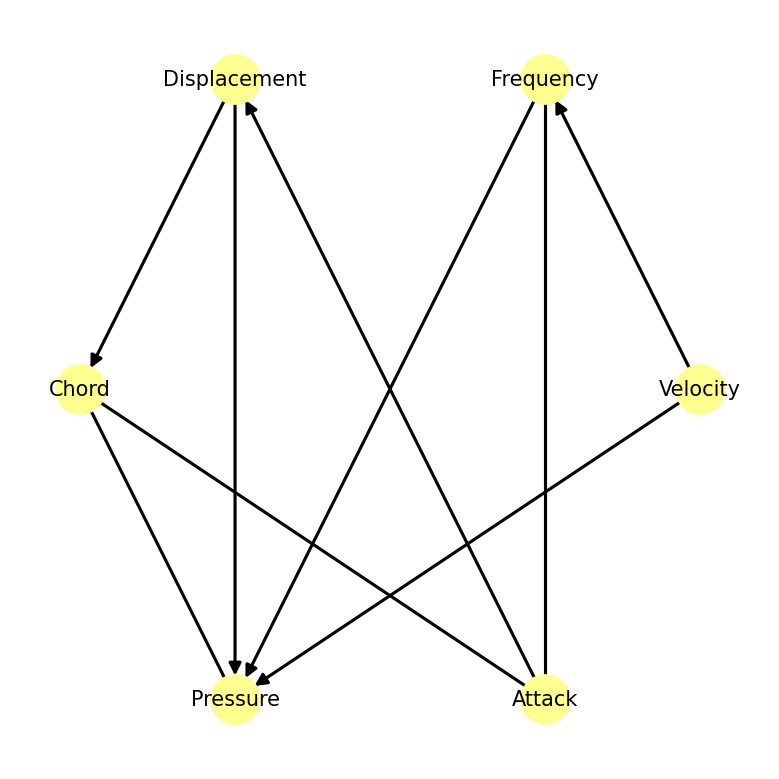

In [313]:
from networkx.drawing.nx_agraph import graphviz_layout

est_dag = pcalg(set(range(nnodes)), ci_tester)

est_arcs = set()
est_edges = set()
for (i,j) in est_dag.arcs:
    if (proteins[j], proteins[i]) in est_arcs:
        est_edges.add(frozenset({proteins[j], proteins[i]}))
        est_arcs.remove((proteins[j], proteins[i]))
    else:
        est_arcs.add((proteins[i], proteins[j]))

G = nx.DiGraph(
    est_arcs
)

E = nx.Graph(est_edges)

plt.figure(figsize=(5, 5), dpi=150)
pos = nx.circular_layout(G)
nx.draw(
    E, pos=pos, node_color='w',linewidths=2.0, width=1.5
)
nx.draw(
    G,
    arrowsize=12,
    with_labels=True,
    node_size=500,
    node_color="#ffff8f",
    linewidths=2.0,
    width=1.5,
    font_size=10,
    pos = pos
)

In [310]:
real_arcs = []
real_arcs_named = []
with open('./real-data/sachs.2005.ground.truth.graph.txt', 'r') as file:
    for line in file:
        if '.' in line:
            l = line.strip().split(' ')
            real_arcs.append((proteins.index(l[1]), proteins.index(l[3])))
            real_arcs_named.append((l[1], l[3]))

ValueError: 'erk' is not in list

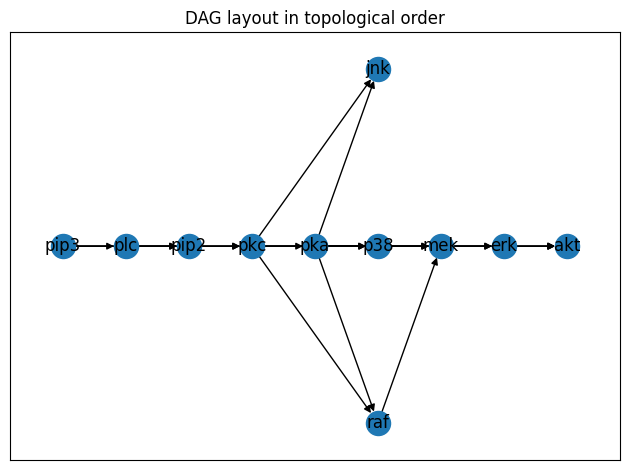

In [193]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph(
    real_arcs_named
)

for layer, nodes in enumerate(nx.topological_generations(G)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
        G.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G, subset_key="layer")

fig, ax = plt.subplots()
nx.draw_networkx(G, pos=pos, ax=ax)
ax.set_title("DAG layout in topological order")
fig.tight_layout()
plt.show()

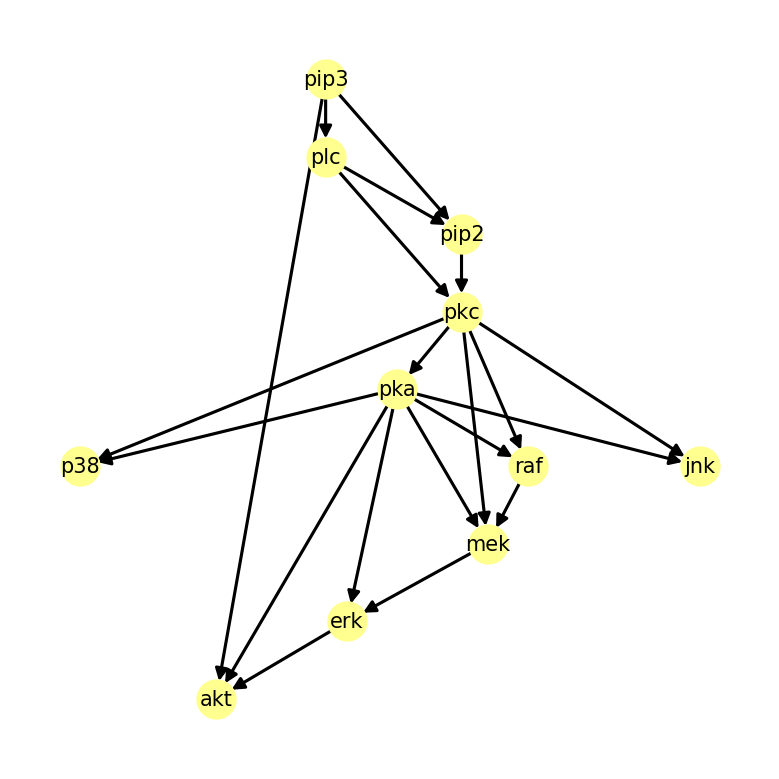

In [136]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.DiGraph(
    real_arcs_named

)
plt.figure(figsize=(5, 5), dpi=150)
nx.draw(
    G,
    arrowsize=12,
    with_labels=True,
    node_size=300,
    node_color="#ffff8f",
    linewidths=2.0,
    width=1.5,
    font_size=10,
    pos= graphviz_layout(G, 'dot')
)
# nx.draw_planar(
#     G,
#     arrowsize=12,
#     with_labels=True,
#     node_size=500,
#     node_color="#ffff8f",
#     linewidths=2.0,
#     width=1.5,
#     font_size=10,
# )